In [1]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
import torch

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
# Render the figure in a notebook:
%matplotlib inline  

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

from sklearn import metrics

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.nn.functional as F

from torchmetrics.classification import Accuracy
from torchmetrics.classification import Recall
from torchmetrics import R2Score
from torchmetrics import MeanAbsoluteError

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
x_train = pd.read_csv('../no_nontoxic_nans_X_train.csv')
y_train = pd.read_csv('../no_nontoxic_nans_y_train.csv')

x_val = pd.read_csv('../no_nontoxic_nans_X_val.csv')
y_val = pd.read_csv('../no_nontoxic_nans_y_val.csv')

x_test = pd.read_csv('../no_nontoxic_nans_x_test.csv')
y_test = pd.read_csv('../no_nontoxic_nans_y_test.csv')

In [3]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=10)
def get_model_matrics(x_data,y_data,model):
    DTC_gini_pred = DTC_gini.predict(x_data.drop(columns='Unnamed: 0'))
    DTC_gini_acc = metrics.accuracy_score(y_data.drop(columns='Unnamed: 0'), DTC_gini_pred)
    print('accuracy:', DTC_gini_acc)

DTC_gini.fit(x_train.drop(columns='Unnamed: 0'), y_train.drop(columns='Unnamed: 0'))
get_model_matrics(x_train, y_train, DTC_gini)
get_model_matrics(x_val,y_val,DTC_gini)
get_model_matrics(x_test,y_test, DTC_gini)

accuracy: 0.9086968301273368
accuracy: 0.7613636363636364
accuracy: 0.7550505050505051


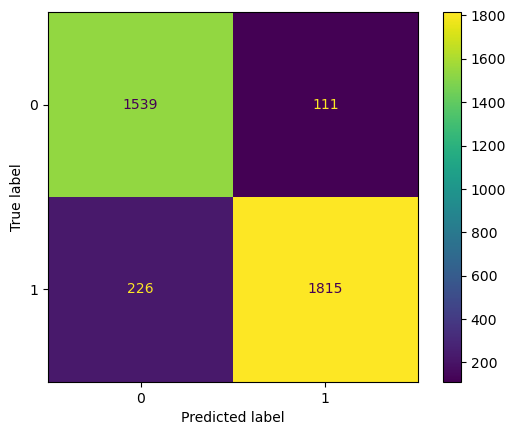

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
DTC_gini_y_pred = DTC_gini.predict(x_train.drop(columns='Unnamed: 0'))
ConfusionMatrixDisplay.from_predictions(y_train.drop(columns='Unnamed: 0'),DTC_gini_y_pred)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


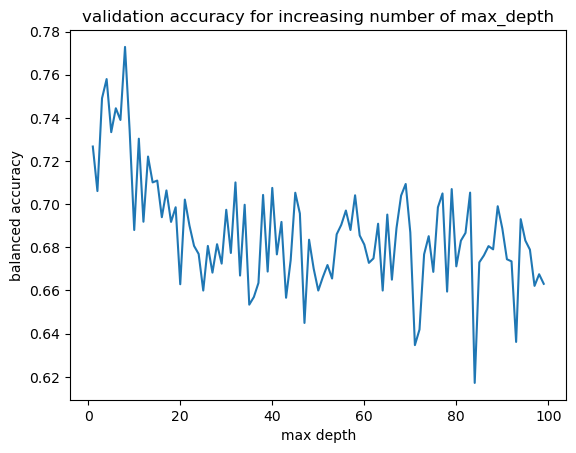

In [5]:
#learning curve
acc_list = []
i_list = []
for i in range(1,100): #number of iterations:
    print(i)
    DTC_gini_i = DecisionTreeClassifier(criterion='gini', max_depth=i) #new GINI model with i learning depth
    DTC_gini_i.fit(x_train.drop(columns='Unnamed: 0'), y_train.drop(columns='Unnamed: 0')) #fit the model to training data.
    
    DTC_gini_pred_val = DTC_gini_i.predict(x_val.drop(columns='Unnamed: 0'))
    DTC_gini_acc_val = metrics.balanced_accuracy_score(y_val.drop(columns='Unnamed: 0'), DTC_gini_pred_val)
    acc_list.append(DTC_gini_acc_val)
    i_list.append(i)
plt.plot(i_list, acc_list)
plt.title('validation accuracy for increasing number of max_depth')
plt.xlabel('max depth')
plt.ylabel('balanced accuracy')
plt.show()


# DTC_gini.fit(x_train.drop(columns='Unnamed: 0'), y_train.drop(columns='Unnamed: 0'))
# get_model_metrics(x_train, y_train, DTC_gini)
# get_model_metrics(x_val,y_val,DTC_gini)

In [6]:
for i in i_list:
    print(i, acc_list[i-1])
    #i = 10 is the best!

1 0.7267197140056507
2 0.7060773799227353
3 0.7490918526206538
4 0.7579715158853716
5 0.733379461454189
6 0.7444502104595514
7 0.7390301562590094
8 0.7728766649368621
9 0.7342443637202329
10 0.688029752637952
11 0.7303523035230353
12 0.6918641526840801
13 0.7220780718445483
14 0.7100847604220724
15 0.7109496626881162
16 0.6939687481981203
17 0.7063656806780834
18 0.6917776624574756
19 0.698581560283688
20 0.6628899267716082
21 0.7021276595744681
22 0.6901343481519921
23 0.6806780833765784
24 0.6769301735570548
25 0.6599780891425936
26 0.6806492533010436
27 0.6682811508966153
28 0.681456495416018
29 0.672461511849161
30 0.6973995271867612
31 0.6773914547656115
32 0.7100847604220724
33 0.6669261373464799
34 0.6997347633050799
35 0.6534336619961945
36 0.6569797612869746
37 0.6635241884333738
38 0.7042899152395778
39 0.6687712621807069
40 0.7075477137750101
41 0.6767283630283112
42 0.6917776624574756
43 0.656633800380557
44 0.674047166003575
45 0.7052989678832959
46 0.6956697226546733
47 0

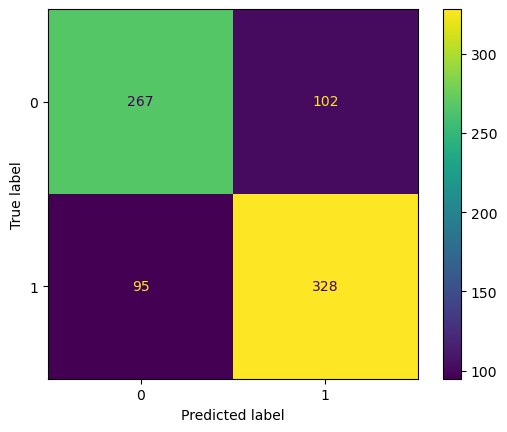

In [7]:
DTC_gini_10 = DecisionTreeClassifier(criterion='gini', max_depth=10) #new GINI model with i learning depth
DTC_gini_10.fit(x_train.drop(columns='Unnamed: 0'), y_train.drop(columns='Unnamed: 0'))
ConfusionMatrixDisplay.from_predictions(y_val.drop(columns='Unnamed: 0'),DTC_gini_10.predict(x_val.drop(columns='Unnamed: 0')))

this isn't great. Who knows?

In [8]:
#find the recall and F1 score to present.
DTC_gini_10_test_pred = DTC_gini_10.predict(x_test.drop(columns='Unnamed: 0'))
DTC_gini_10_test_pred_f1 = metrics.f1_score(y_test.drop(columns='Unnamed: 0'), DTC_gini_pred_val)
DTC_gini_10_test_pred_recall = metrics.balanced_accuracy_score(y_test.drop(columns='Unnamed: 0'), DTC_gini_pred_val)

In [9]:
print(f'recall test {DTC_gini_10_test_pred_recall}')
print(f'f1 test {DTC_gini_10_test_pred_f1}')

recall test 0.5029871323529411
f1 test 0.5236363636363637


Text(0.5, 1.0, 'confusion matrix for 10 depth, on test data')

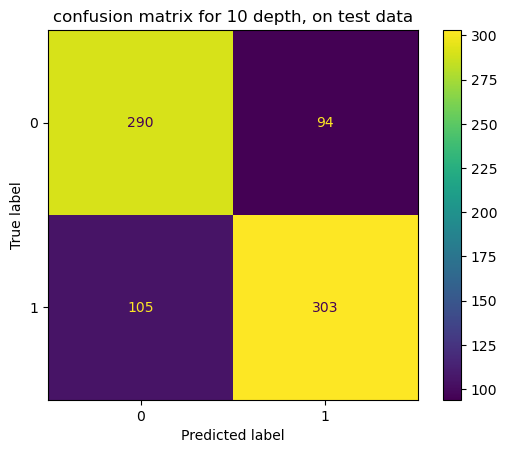

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test.drop(columns='Unnamed: 0'),DTC_gini_10.predict(x_test.drop(columns='Unnamed: 0')))
plt.title('confusion matrix for 10 depth, on test data')

# More hyperparameter tuning

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


In [12]:
param_grid = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tuning_DTC = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tuning_DTC, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='balanced_accuracy')

grid_search.fit(x_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(x_test)
bacc = metrics.balanced_accuracy_score(y_test, y_pred)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"bacc: {bacc}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits


KeyboardInterrupt: 

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test RMSE: 1483.7467205719718

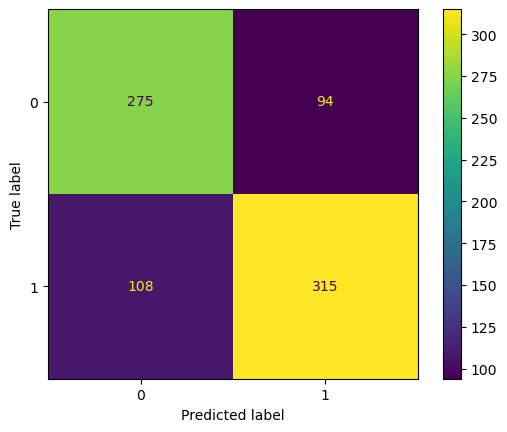

In [13]:
DTC_gini_best = DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_leaf=1,min_samples_split=2) #new GINI model with i learning depth
DTC_gini_best.fit(x_train.drop(columns='Unnamed: 0'), y_train.drop(columns='Unnamed: 0'))
ConfusionMatrixDisplay.from_predictions(y_val.drop(columns='Unnamed: 0'),DTC_gini_best.predict(x_val.drop(columns='Unnamed: 0')))

DTC_gini_best_test_pred = DTC_gini_best.predict(x_test.drop(columns='Unnamed: 0'))
DTC_gini_best_test_pred_f1 = metrics.f1_score(y_test.drop(columns='Unnamed: 0'), DTC_gini_best_test_pred)
DTC_gini_best_test_pred_bacc = metrics.balanced_accuracy_score(y_test.drop(columns='Unnamed: 0'), DTC_gini_best_test_pred)

In [14]:
def get_feature_importance(model_fitted, top_n=10, df_x_train=x_train): #need to provide a fitted model, top_n = top n features to return sorted by toxicity (default 10), df_x_train = the name of your x_train dataframe (for naming reasons). defaults to x_train
    """Returns the feature importances as a dataframe"""
    importances_permutation = model_fitted.feature_importances_
    # std = np.std([tree.feature_importances_ for tree in model_fitted.estimators_], axis=0)
    df_importances_permutation = pd.DataFrame(importances_permutation)
    df_importances_permutation['feature'] = df_x_train.drop(columns='Unnamed: 0').columns

    df_top_n_importances_permutation = df_importances_permutation.nlargest(top_n, 0)
    print(df_top_n_importances_permutation,'\n')

    df_importances_permutation_FG = df_importances_permutation[df_importances_permutation['feature'].str.contains("fr_")] #new df containing only the features called fr_, i.e. the functional groups
    df_importances_permutation_FG_top_10 = df_importances_permutation_FG.nlargest(top_n,0)
    print(df_importances_permutation_FG_top_10)

In [15]:
get_feature_importance(DTC_gini_best)

            0         feature
28   0.228107         BertzCT
130  0.073650         MolLogP
7    0.036868  HeavyAtomMolWt
105  0.030132    FractionCSP3
4    0.029765             qed
18   0.024757     BCUT2D_MWHI
22   0.022769   BCUT2D_LOGPHI
83   0.018277            TPSA
21   0.013988    BCUT2D_CHGLO
26   0.013634          AvgIpc 

            0                 feature
198  0.010873  fr_phenol_noOrthoHbond
135  0.009620                  fr_ArN
215  0.009101        fr_unbrch_alkane
144  0.006762                  fr_C_S
133  0.002709                fr_Al_OH
137  0.002574                 fr_Ar_N
158  0.001484         fr_allylic_oxid
132  0.001421               fr_Al_COO
136  0.001417               fr_Ar_COO
205  0.001370             fr_pyridine


In [ ]:
from sklearn import metrics
def get_model_metrics(fitted_model, x_train, x_val, y_train, y_val):
    pred_X_train = fitted_model.predict(x_train)
    pred_X_val = fitted_model.predict(x_val)
    train_bal_acc = metrics.balanced_accuracy_score(y_train, pred_X_train)
    val_bal_acc = metrics.balanced_accuracy_score(y_val, pred_X_val)
    train_recall = metrics.recall_score(y_train, pred_X_train)
    val_recall = metrics.recall_score(y_val, pred_X_val)
    train_precision = metrics.precision_score(y_train, pred_X_train)
    val_precision = metrics.precision_score(y_val, pred_X_val)
    train_f1 = metrics.f1_score(y_train, pred_X_train)
    val_f1 = metrics.f1_score(y_val, pred_X_val)
    metric_list = [train_bal_acc, train_recall, train_precision, train_f1, val_bal_acc, val_recall, val_precision, val_f1]

DTC_gini_best.predict(x_test.drop(columns='Unnamed: 0'))

In [44]:
y_train

,Unnamed: 0,toxic
0,2839,0
1,4142,0
2,5263,1
3,4453,0
4,818,0
...,...,...
3686,1303,0
3687,3982,1
3688,2812,0
3689,3836,1


In [46]:
pred_X_train = DTC_gini_best.predict(x_train.drop(columns='Unnamed: 0'))
pred_X_val = DTC_gini_best.predict(x_val.drop(columns='Unnamed: 0'))
train_bal_acc = metrics.balanced_accuracy_score(y_train.drop(columns='Unnamed: 0'), pred_X_train)
val_bal_acc = metrics.balanced_accuracy_score(y_val.drop(columns='Unnamed: 0'), pred_X_val)
train_recall = metrics.recall_score(y_train.drop(columns='Unnamed: 0'), pred_X_train)
val_recall = metrics.recall_score(y_val.drop(columns='Unnamed: 0'), pred_X_val)
train_precision = metrics.precision_score(y_train.drop(columns='Unnamed: 0'), pred_X_train)
val_precision = metrics.precision_score(y_val.drop(columns='Unnamed: 0'), pred_X_val)
train_f1 = metrics.f1_score(y_train.drop(columns='Unnamed: 0'), pred_X_train)
val_f1 = metrics.f1_score(y_val.drop(columns='Unnamed: 0'), pred_X_val)
metric_list = [train_bal_acc, train_recall, train_precision, train_f1, val_bal_acc, val_recall, val_precision, val_f1]

In [50]:
pd.DataFrame(metric_list)

,0
0,0.911263
1,0.881921
2,0.948367
3,0.913938
4,0.744969
5,0.744681
6,0.770171
7,0.757212
